# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import mplleaflet


In [ ]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

In [2]:
# sort the df by ID and Date
df = df.sort_values(by=['Date','ID'])

In [3]:
# convert column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [4]:
# between 2005-2015 leap years were 2008 and 2012 delete feb 29 from both years from the data
# get of indexes for which
feb_08 = df[df['Date'] == '2008-02-29'].index
feb_12 = df[df['Date'] == '2012-02-29'].index

In [5]:
# Delete these row indexes from dataFrame-2008
df.drop(feb_08 , inplace=True)

# Delete these row indexes from dataFrame-2012
df.drop(feb_12 , inplace=True)

In [6]:
# covert temperaure 'Data_Value' from (tenths of degrees C) to C 

# applying the division function across all rows

df['Data_Value']= df['Data_Value'].apply(lambda x :  x/(10) )

In [7]:
# sepaate the max min temperatures into two different columns

#TMAX column DF
TMAX_df = df[df['Element']=='TMAX'].reset_index(drop=True).rename(columns={'Data_Value':'TMAX'}).drop('Element', axis=1)

#TMAX column DF
TMIN_df = df[df['Element']=='TMIN'].reset_index(drop=True).rename(columns={'Data_Value':'TMIN'}).drop('Element', axis=1)

In [8]:
temperatures = pd.merge(TMAX_df, TMIN_df, on=["ID", "Date"])

In [9]:
# extract day and month of dates
temperatures['Month_day'] = temperatures['Date'].apply(lambda x: '{0:02}/{1:02}'.format(x.month,x.day))

In [10]:
# extract temperatures from 2015
temp_2015 = temperatures[temperatures['Date'].dt.year==2015]

In [11]:
# remove temperatures from 2015
temperatures = temperatures[temperatures['Date'].dt.year!=2015]

In [12]:
min_max_group= temperatures.groupby(['Month_day'])['TMAX', 'TMIN'].agg({'TMAX': np.max, 'TMIN': np.min}).reset_index()

<ipython-input-12-4c114d69e288>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  min_max_group= temperatures.groupby(['Month_day'])['TMAX', 'TMIN'].agg({'TMAX': np.max, 'TMIN': np.min}).reset_index()


In [13]:
min_max_2015= temp_2015.groupby('Month_day')['TMAX', 'TMIN'].agg({'TMAX': np.max, 'TMIN': np.min}).reset_index()

<ipython-input-13-c5ce6f4bf25d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  min_max_2015= temp_2015.groupby('Month_day')['TMAX', 'TMIN'].agg({'TMAX': np.max, 'TMIN': np.min}).reset_index()


In [15]:
# merge data of 2015 with grouped data
#temp_grouped_2015 = pd.merge(left=min_max_2015,right=min_max_group, on=["Month_day"],left_index=True,right_index=True, suffixes=('_2015',''))
temp_grouped_2015 = pd.merge( min_max_2015, min_max_group, on=["Month_day"],suffixes=('_2015',''))

In [16]:
#get the min max in year 2015 as separate data points for later use in graph

temp_grouped_2015['max_recorded'] = temp_grouped_2015.apply(lambda x : x['TMAX_2015'] if x['TMAX_2015'] > x['TMAX'] else 0, axis=1)
temp_grouped_2015['min_recorded'] = temp_grouped_2015.apply(lambda x : x['TMIN_2015'] if x['TMIN_2015'] < x['TMIN'] else 0, axis=1)

In [17]:
# get non zero points for 2015
max_points=temp_grouped_2015[temp_grouped_2015['max_recorded']!=0]
min_points=temp_grouped_2015[temp_grouped_2015['min_recorded']!=0]

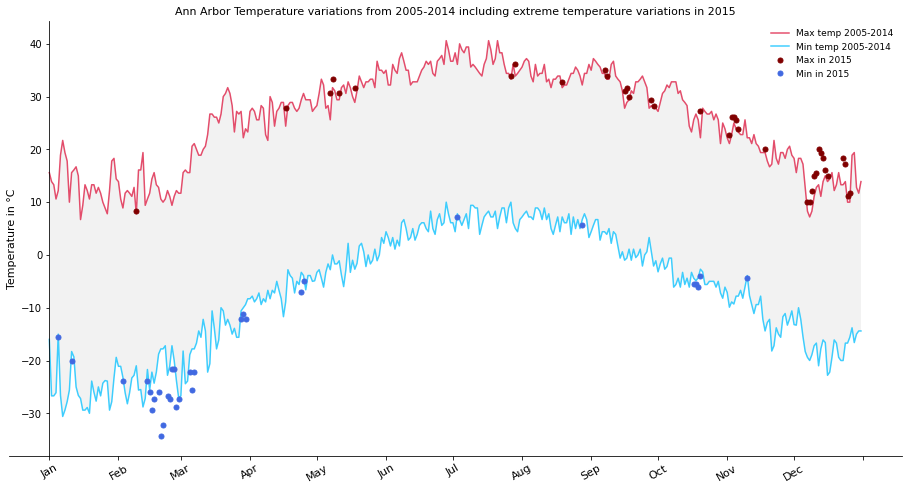

In [22]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(16,8))

# Create high temperature line and low temperature line
ax.plot(temp_grouped_2015['TMAX'], 'crimson', alpha = 0.75, label = 'Max temp 2005-2014')
ax.plot(temp_grouped_2015['TMIN'], 'deepskyblue', alpha = 0.75, label = 'Min temp 2005-2014')

# create points for 2015 temperatures
ax.plot(max_points['max_recorded'],label='Max in 2015',marker='o',linewidth=0,markersize=5,color='maroon')
ax.plot(min_points['min_recorded'],label='Min in 2015',marker='o',linewidth=0,markersize=5,color='royalblue')


# fill the area between the max data and min data
ax.fill_between(range(len(temp_grouped_2015['TMIN'])),
                temp_grouped_2015['TMAX'], temp_grouped_2015['TMIN'], 
                facecolor='grey', 
                alpha=0.10)

#name the X-axis labels
a=[0,31,59,90,120,151,181,212,243,273,304,334,365]
ax.set_xticks(a)
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','']
ax.set_xticklabels(Month_name, rotation=30, fontsize = 11)

#set labels and title
ax.set_xlabel(" ")
ax.set_ylabel("Temperature in °C", fontsize = 11)
ax.set_title('Ann Arbor Temperature variations from 2005-2014 including extreme temperature variations in 2015', fontsize = 11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_position('zero')

#set legend
ax.legend(frameon=False, fontsize = 9)

plt.show()